In [4]:
# Dima Oana-Teodora 241
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

import tensorflow as tf
# import tensorflow.compat.v1 as tf 
#tf.disable_v2_behavior()

from tensorflow import keras
from tensorflow.keras import layers

import csv

from sklearn.utils import shuffle

from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.layers.core import Dropout
from sklearn import metrics


In [5]:
# citire imagini de antrenare plus etichete de antrenare
f = open ("train.txt") # deschidere fisier
train_images = []
train_labels = []
for line in enumerate(open("train.txt", "r")):
    v = line[1].split(',') # citire linie din fisier
    image_name = 'train/'+v[0] # formare cale catre folderul cu imagini
    label = int(v[1]) # transformare numar clasa din string in int
    train_labels.append(label) # adaugare clasa 
    image = plt.imread(image_name) # citire imagine matrice 32 X 32
    
    image=image.reshape(-1) # din 2D => 1D
    
    train_images.append(image) # adaugare imagine
# transformare in numpy arrays
train_images = np.array(train_images) 
train_labels = np.array(train_labels) 

train_images, train_labels = shuffle(train_images, train_labels) # amestecare

In [6]:
# citire imagini de testare 
f = open ("test.txt")
test_images = []
name_test_images =[]
for line in enumerate(open("test.txt", "r")):
    image_name = 'test/'+ line[1][:len(line[1])-1] # formare cale director cu imagini 
                                                    #(+ sterg caracterul '\n' de la final, altfel => erooare)
    name_test_images.append(line[1][:len(line[1])-1])
    image = plt.imread(image_name)
    image=image.reshape(-1) # din 2D => 1D
    test_images.append(image)
    
test_images = np.array(test_images)

In [7]:
# citire imagini de validare plus etichete de validare
f = open ("validation.txt")
validation_images = []
validation_labels = []
for line in enumerate(open("validation.txt", "r")):
    v = line[1].split(',')
    image_name = 'validation/'+v[0]
    label = int(v[1])
    validation_labels.append(label)
    image = plt.imread(image_name)
    image=image.reshape(-1) # din 2D => 1D
    validation_images.append(image)

validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

validation_images, validation_labels = shuffle(validation_images, validation_labels)

In [8]:
classes = 9 # 9 categorii notate de la 0 la 8

y_val=np_utils.to_categorical(validation_labels, classes) 
y_train=np_utils.to_categorical(train_labels, classes) 

In [9]:
model = Sequential()
model.add(Dense(1000, input_shape =(train_images.shape[1],)))
model.add(Activation ('relu'))
model.add(Dense(200))
model.add(Activation ('sigmoid'))
model.add(Dense(classes))
model.add(Activation ('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              1025000   
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               200200    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1809      
_________________________________________________________________
activation_2 (Activation)    (None, 9)                 0         
Total params: 1,227,009
Trainable params: 1,227,009
Non-trainable params: 0
______________________________________________

In [10]:
# configurare model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-6, decay=1e-6), metrics=['accuracy'])
# antrenare model
history = model.fit(train_images, y_train, batch_size=200, epochs=100, verbose=2, validation_data=(validation_images, y_val))
# evaluare model
loss_accuracy = model.evaluate(validation_images, y_val)
print(loss_accuracy)

Epoch 1/100
151/151 - 7s - loss: 0.2957 - accuracy: 0.3696 - val_loss: 0.3658 - val_accuracy: 0.2388
Epoch 2/100
151/151 - 4s - loss: 0.2419 - accuracy: 0.5121 - val_loss: 0.3441 - val_accuracy: 0.3246
Epoch 3/100
151/151 - 4s - loss: 0.2188 - accuracy: 0.5686 - val_loss: 0.3296 - val_accuracy: 0.3664
Epoch 4/100
151/151 - 4s - loss: 0.2040 - accuracy: 0.6040 - val_loss: 0.2805 - val_accuracy: 0.4486
Epoch 5/100
151/151 - 4s - loss: 0.1926 - accuracy: 0.6299 - val_loss: 0.2658 - val_accuracy: 0.5142
Epoch 6/100
151/151 - 4s - loss: 0.1842 - accuracy: 0.6470 - val_loss: 0.3084 - val_accuracy: 0.4460
Epoch 7/100
151/151 - 4s - loss: 0.1767 - accuracy: 0.6626 - val_loss: 0.3689 - val_accuracy: 0.3426
Epoch 8/100
151/151 - 4s - loss: 0.1708 - accuracy: 0.6742 - val_loss: 0.2046 - val_accuracy: 0.5958
Epoch 9/100
151/151 - 4s - loss: 0.1635 - accuracy: 0.6913 - val_loss: 0.2106 - val_accuracy: 0.5926
Epoch 10/100
151/151 - 4s - loss: 0.1572 - accuracy: 0.7060 - val_loss: 0.1979 - val_accura

Epoch 82/100
151/151 - 4s - loss: 0.0203 - accuracy: 0.9735 - val_loss: 0.2841 - val_accuracy: 0.6920
Epoch 83/100
151/151 - 5s - loss: 0.0194 - accuracy: 0.9749 - val_loss: 0.2242 - val_accuracy: 0.7596
Epoch 84/100
151/151 - 4s - loss: 0.0195 - accuracy: 0.9738 - val_loss: 0.3265 - val_accuracy: 0.6798
Epoch 85/100
151/151 - 4s - loss: 0.0183 - accuracy: 0.9764 - val_loss: 0.2532 - val_accuracy: 0.7462
Epoch 86/100
151/151 - 4s - loss: 0.0186 - accuracy: 0.9764 - val_loss: 0.2216 - val_accuracy: 0.7694
Epoch 87/100
151/151 - 4s - loss: 0.0186 - accuracy: 0.9757 - val_loss: 0.2278 - val_accuracy: 0.7642
Epoch 88/100
151/151 - 4s - loss: 0.0189 - accuracy: 0.9757 - val_loss: 0.2253 - val_accuracy: 0.7592
Epoch 89/100
151/151 - 4s - loss: 0.0165 - accuracy: 0.9792 - val_loss: 0.2889 - val_accuracy: 0.7134
Epoch 90/100
151/151 - 4s - loss: 0.0187 - accuracy: 0.9754 - val_loss: 0.2288 - val_accuracy: 0.7620
Epoch 91/100
151/151 - 4s - loss: 0.0178 - accuracy: 0.9775 - val_loss: 0.2296 - v

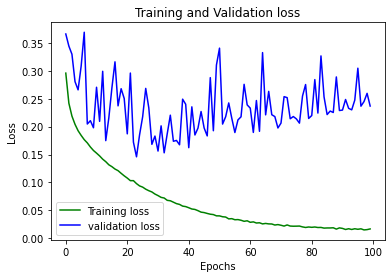

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(100)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

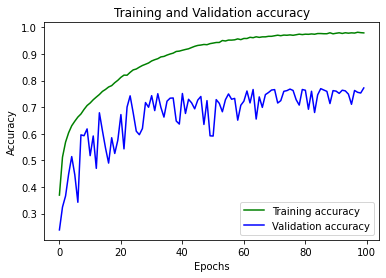

In [12]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(100)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# prezic clasele pe imaginile de validare
y_pred=model.predict_classes(validation_images).astype("int32")
# calcul matrice de confuzie
confusion_matrix=metrics.confusion_matrix(validation_labels, y_pred, labels=[0,1,2,3,4,5,6,7,8])
#print(confusion_matrix)

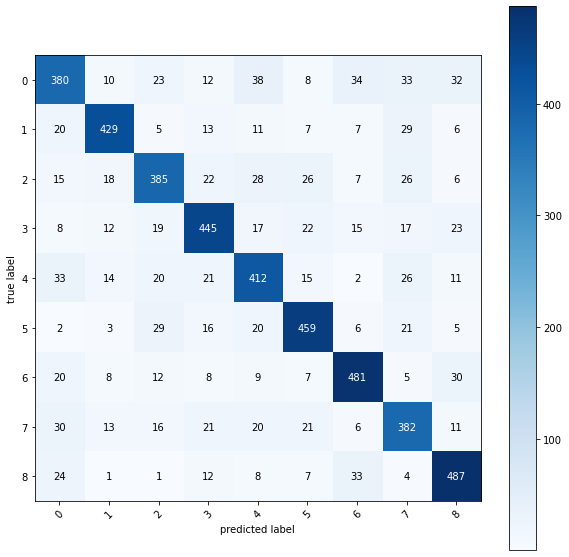

In [14]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix, colorbar=True, 
                      class_names=[0,1,2,3,4,5,6,7,8], 
                      figsize=(10, 10))
plt.show()

In [15]:
# prezicere
predict = model.predict_classes(test_images).astype("int32")

# scriere in fisier 
f = open("submission_2.csv", "w", newline="")
csv_file= csv.writer(f, delimiter=",") #stabilire delimitatori cuvinte
csv_file.writerow(['id', 'label']) # capul de tabel
for i in range (predict.shape[0]):
    csv_file.writerow([name_test_images[i], predict[i]])
f.close()